In [7]:
import numpy as np
import pandas as pd
import math
import sklearn.metrics
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn import metrics

In [8]:
p=0.01
my_data= pd.read_csv("frauddata.csv",header=0, skiprows=lambda i: i>0 and random.random() > p)

In [9]:
my_data["type"] = my_data["type"].map({"CASH_OUT": 1, "PAYMENT": 2,"CASH_IN": 3, "TRANSFER": 4,"DEBIT": 5})
my_data["isFraud"] = my_data["isFraud"].map({0: "No Fraud", 1: "Fraud"})

In [10]:
my_data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,2,3876.41,C504336483,67852.00,63975.59,M1404932042,0.00,0.00,No Fraud,0
1,1,1,212228.35,C1896074070,0.00,0.00,C401424608,429747.00,1178808.14,No Fraud,0
2,1,2,2610.01,C1528769018,58697.54,56087.54,M183155105,0.00,0.00,No Fraud,0
3,1,3,62325.15,C695530017,960786.56,1023111.71,C564160838,1880271.66,1254956.07,No Fraud,0
4,1,3,6287.28,C1765702,4817829.42,4824116.71,C1651855867,11274.00,0.00,No Fraud,0
...,...,...,...,...,...,...,...,...,...,...,...
63484,719,4,534518.98,C1636058456,534518.98,0.00,C937763226,0.00,0.00,Fraud,0
63485,725,1,873322.61,C2077011049,873322.61,0.00,C1352808930,258993.92,1132316.53,Fraud,0
63486,732,1,249365.63,C1261928380,249365.63,0.00,C1342636720,0.00,249365.63,Fraud,0
63487,734,1,2079746.13,C1063299871,2079746.13,0.00,C884992368,0.00,2079746.13,Fraud,0


In [15]:
my_data.drop(['nameOrig','nameDest'],axis=1,inplace=True)
x=my_data.drop('isFraud',axis=1)
y=my_data['isFraud']
for i in range(1,7):
    max_x=max(x.iloc[:,i])
    min_x=min(x.iloc[:,i])
    x.iloc[:,i]=(x.iloc[:,i]-min_x)/(max_x-min_x)


In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)
x_cv, x_test_new=np.split(x_test, 2)
y_cv , y_test_new=np.split(y_test, 2)

In [17]:
y_train_new=np.zeros(len(y_train))
for i in range (len(y_train)):
    if y_train.iloc[i] == 'Fraud':
        y_train_new[i] =1 
y_train_new=pd.DataFrame(y_train_new)

In [18]:
y_cv_new=np.zeros(len(y_cv))
for i in range (len(y_cv)):
    if y_cv.iloc[i] == 'Fraud':
        y_cv_new[i] =1

In [19]:
y_test_new_1=np.zeros(len(y_cv))
for i in range (len(y_test_new)):
    if y_test_new.iloc[i] == 'Fraud':
        y_test_new_1[i] =1

In [20]:
def generateXvector(X):#add coloumn of 1 in X features
    """ Taking the original independent variables matrix and add a row of 1 which corresponds to x_0
        Parameters:
          X:  independent variables matrix
        Return value: the matrix that contains all the values in the dataset, not include the outcomes variables.  """
    vectorX = np.c_[np.ones((len(X), 1)), X]
    return vectorX

In [21]:
def theta_init(X):
    """ Generate an initial value of vector θ from the original independent variables matrix
         Parameters:
          X:  independent variables matrix
        Return value: a vector of theta filled with initial guess
    """
    theta = np.random.randn(X+1, 1)
    return theta

In [22]:
def sigmoid_function(X):
    """ Calculate the sigmoid value of the inputs
         Parameters:
          X:  values
        Return value: the sigmoid value
    """
    return 1/(1+math.e**(-X))

In [23]:
def Logistics_Regression(X,y,learningrate, iterations):
        
    y_new = y
    cost_lst = []
    vectorX = generateXvector(X)
    theta = theta_init(len(X.iloc[0,:]))
    m = len(X)
    for i in range(iterations):
        gradients = 2/m * vectorX.T.dot(sigmoid_function(vectorX.dot(theta)) - y_new)
        theta = theta - learningrate * gradients
        y_pred = sigmoid_function(vectorX.dot(theta))
        cost_value = - np.sum(np.dot(y_new.T,np.log(y_pred)+ np.dot((1-y_new).T,np.log(1-y_pred)))) /(len(y_pred))
        cost_lst.append(cost_value)
        
    return theta, cost_value

In [24]:
theta1, cost_value1=Logistics_Regression(x_train,y_train_new,0.03, 100)

In [25]:
def root_regularization(y_pred,y_test,theta):
    cost_reg=100
    best_lamda=0
    lamda=np.array([0.01,0.02,0.04,0.08,0.16,0.32,0.64,1.28,2.56,5.12,10.24])
    cost_lst = []
    m = len(x)
    N = len(y_test)
    for i in range(np.size(lamda)):
        term=(lamda[i]/2*N)*(np.sum(theta**2))
        cost_value = (- np.sum(np.dot(y_test.T,np.log(y_pred)+ np.dot((1-y_test).T,np.log(1-y_pred)))) /(len(y_pred)))+term
        cost_lst.append(cost_value)
        if cost_value<cost_reg:
            cost_reg=cost_value
            best_lamda=lamda[i]
    return best_lamda,cost_reg

In [26]:
def rmse(y_pred,y_test):
    cost_value = (- np.sum(np.dot(y_test.T,np.log(y_pred)+ np.dot((1-y_test).T,np.log(1-y_pred)))) /(len(y_pred)))
    return cost_value

In [27]:
cost_cv=100
theta1_cv=[]
for j in range(9):
    vectorX=generateXvector(x_cv.iloc[:,0:j])
    theta2, cost_value1=Logistics_Regression(x_train.iloc[:,0:j],y_train_new,0.03, 100)
   
    y_pred = sigmoid_function(vectorX.dot(theta2))#calculate hypothesis using best thetas
    best_lamda,cost_reg=root_regularization(y_pred,y_cv_new,theta2)
    if cost_value1<cost_cv:
        cost_cv=cost_value1
        theta1_cv=theta2
    if cost_reg<cost_cv:
        cost_cv=cost_reg
        theta1_cv=theta2

C:\Users\Win-10\AppData\Local\Temp/ipykernel_10264/652476340.py:7: RuntimeWarning: overflow encountered in power
  return 1/(1+math.e**(-X))
C:\Users\Win-10\AppData\Local\Temp/ipykernel_10264/46542404.py:12: RuntimeWarning: divide by zero encountered in log
  cost_value = - np.sum(np.dot(y_new.T,np.log(y_pred)+ np.dot((1-y_new).T,np.log(1-y_pred)))) /(len(y_pred))
C:\Users\Win-10\AppData\Local\Temp/ipykernel_10264/2464514834.py:10: RuntimeWarning: divide by zero encountered in log
  cost_value = (- np.sum(np.dot(y_test.T,np.log(y_pred)+ np.dot((1-y_test).T,np.log(1-y_pred)))) /(len(y_pred)))+term


In [28]:
y_pred_test=sigmoid_function(np.dot(x_test_new.iloc[:,0:np.size(theta1_cv)], theta1_cv))
cost_y_test=rmse(y_pred_test,y_test_new_1)
cost_test_reg=rmse(y_pred_test,y_test_new_1)+(best_lamda/2*len(y_cv))*(np.sum(theta1_cv**2))

C:\Users\Win-10\AppData\Local\Temp/ipykernel_10264/652476340.py:7: RuntimeWarning: overflow encountered in power
  return 1/(1+math.e**(-X))
C:\Users\Win-10\AppData\Local\Temp/ipykernel_10264/1897399221.py:2: RuntimeWarning: divide by zero encountered in log
  cost_value = (- np.sum(np.dot(y_test.T,np.log(y_pred)+ np.dot((1-y_test).T,np.log(1-y_pred)))) /(len(y_pred)))


In [38]:
skfolds = KFold(n_splits=10)
splits = skfolds.split(x, y)
accuracy_array=[]
for i, (train_index, test_index) in enumerate(splits): #split and shuffle the data  
  x_train = x.iloc[train_index]
  y_train = y.iloc[train_index]
  x_test  = x.iloc[test_index]
  y_test  = y.iloc[test_index]
  clf = LogisticRegression()
  clf.fit(x_train, y_train)
  y_pred = clf.predict(x_test)
  accuracy = np.mean(y_pred == y_test)
  accuracy_array.append(accuracy)

  print("Accuracy is ", accuracy , "per iteration")
print("Best accuracy per iteration is :", np.max(accuracy_array))    

Accuracy is  0.9990549692865018 per iteration
Accuracy is  0.9974799180973382 per iteration
Accuracy is  0.9992124744054182 per iteration
Accuracy is  0.9990549692865018 per iteration
Accuracy is  0.9992124744054182 per iteration
Accuracy is  0.9992124744054182 per iteration
Accuracy is  0.9992124744054182 per iteration
Accuracy is  0.9992124744054182 per iteration
Accuracy is  0.9993699795243346 per iteration
Accuracy is  0.9935412728418399 per iteration
Best accuracy per iteration is : 0.9993699795243346


In [36]:
skfolds_1 = StratifiedKFold(n_splits=9)
splits_1 = skfolds_1.split(x, y)
accuracy_array=[];
for i, (train_index, test_index) in enumerate(splits_1): #split and shuffle the data 
  x_train = x.iloc[train_index]
  y_train = y.iloc[train_index]
  x_test  = x.iloc[test_index]
  y_test  = y.iloc[test_index]
  clf_1 = LogisticRegression()
  clf_1.fit(x_train, y_train)
  y_pred_1 = clf_1.predict(x_test)
  accuracy = np.mean(y_pred_1 == y_test)
  accuracy_array.append(accuracy)
  print("Accuracy is :",  accuracy)
print("Best accuracy is: ", np.max(accuracy_array))

Accuracy is : 0.9984408221119773
Accuracy is : 0.9984408221119773
Accuracy is : 0.9984408221119773
Accuracy is : 0.9985823646158208
Accuracy is : 0.9984406010774028
Accuracy is : 0.9984406010774028
Accuracy is : 0.9984406010774028
Accuracy is : 0.9984406010774028
Accuracy is : 0.9984406010774028
Best accuracy is:  0.9985823646158208


In [31]:
print(sklearn.metrics.confusion_matrix(y_test_new_1,np.round((y_pred_test))))
print(accuracy_score(y_test_new_1, np.round((y_pred_test))) )

[[12682     0]
 [   16     0]]
0.9987399590486691


In [32]:
fpr, tpr, _ = metrics.roc_curve(y_test_new_1,  y_pred_test)
auc = metrics.roc_auc_score(y_test_new_1, y_pred_test)
print("fpr: ", fpr)
print("tpr: ", tpr)
print("auc: ",auc)

fpr:  [0.00000000e+00 7.88519161e-05 1.65273616e-01 1.65273616e-01
 1.74578142e-01 1.74578142e-01 1.88929191e-01 1.88929191e-01
 3.10203438e-01 3.10203438e-01 7.06197761e-01 7.06197761e-01
 8.76202492e-01 8.76202492e-01 9.38180098e-01 9.38180098e-01
 9.43542028e-01 1.00000000e+00]
tpr:  [0.     0.     0.     0.0625 0.0625 0.1875 0.1875 0.25   0.25   0.3125
 0.3125 0.375  0.375  0.4375 0.4375 0.5    0.5    1.    ]
auc:  0.2932305630026809


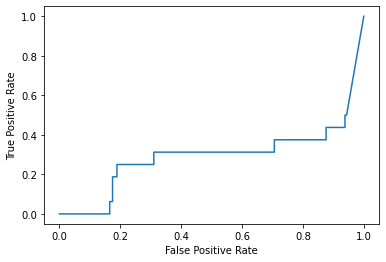

In [33]:
plt.figure()
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
